## HUH😏

In [106]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
data = 'SaYoPillow.csv'

df = pd.read_csv(data)

In [109]:
import warnings

warnings.filterwarnings('ignore')

In [110]:
df.shape

(630, 6)

In [111]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
0,91.840,16.600,89.840,1.840,74.20,3
1,91.552,15.880,89.552,1.552,72.76,3
2,96.000,10.000,95.000,7.000,60.00,1
3,90.768,13.920,88.768,0.768,68.84,3
4,97.872,6.496,96.248,8.248,53.12,0


In [112]:
df.isnull().values.sum()

0

In [113]:
df.duplicated().sum()

0

In [114]:
df.dtypes

body_temperature    float64
limb_movement       float64
Blood_oxygen        float64
Sleeping_hours      float64
Heart_rate          float64
Stress_level          int64
dtype: object

In [115]:
df.describe()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,92.80000,11.700000,90.900000,3.700000,64.500000,2.000000
std,3.52969,4.299629,3.902483,3.054572,9.915277,1.415337
min,85.00000,4.000000,82.000000,0.000000,50.000000,0.000000
25%,90.50000,8.500000,88.500000,0.500000,56.250000,1.000000
50%,93.00000,11.000000,91.000000,3.500000,62.500000,2.000000
75%,95.50000,15.750000,94.250000,6.500000,72.500000,3.000000
max,99.00000,19.000000,97.000000,9.000000,85.000000,4.000000


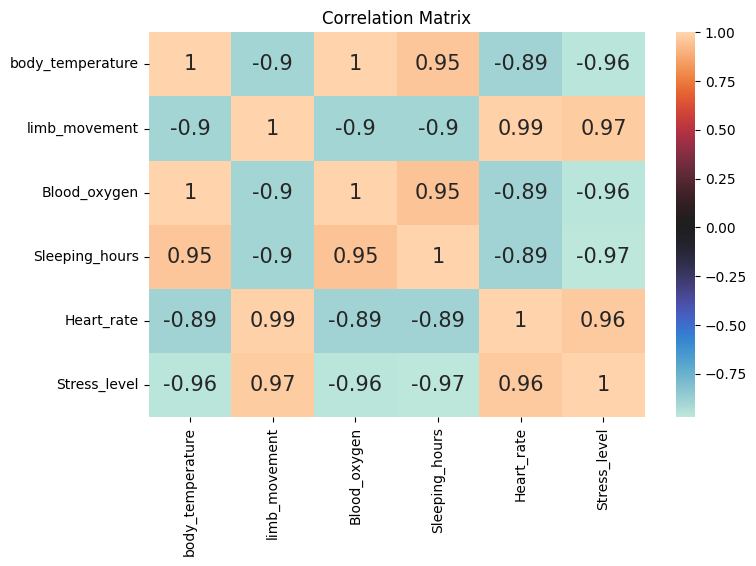

In [116]:
fig, ax = plt.subplots(figsize=(8,5))
cols=["body_temperature", "limb_movement","Blood_oxygen","Sleeping_hours", "Heart_rate", "Stress_level"]
sns.heatmap(df[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})
plt.title("Correlation Matrix")
plt.show()

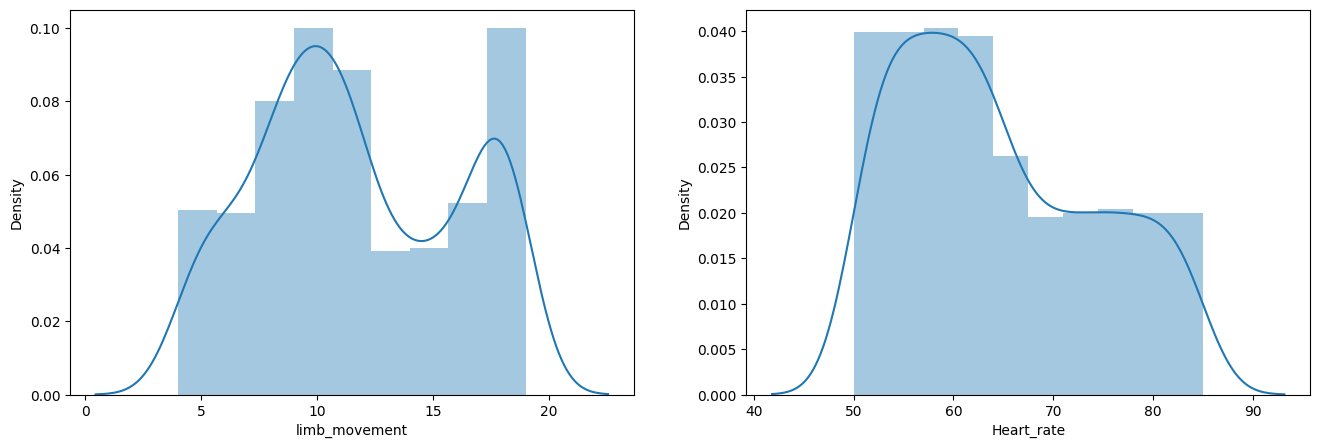

In [117]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['limb_movement'])
plt.subplot(1,2,2)
sns.distplot(df['Heart_rate'])


plt.show()

In [118]:
print("Highest allowed",df['limb_movement'].mean() + 3*df['limb_movement'].std()) ##applying IQR in limb movement
print("Lowest allowed",df['limb_movement'].mean() - 3*df['limb_movement'].std())

Highest allowed 24.598887444167318
Lowest allowed -1.198887444167319


In [119]:
print("Highest allowed",df['Heart_rate'].mean() + 3*df['Heart_rate'].std()) ##applying IQR in Heart_rate
print("Lowest allowed",df['Heart_rate'].mean() - 3*df['Heart_rate'].std())

Highest allowed 94.24583109292098
Lowest allowed 34.75416890707901


In [120]:
df[(df['limb_movement'] > 24.59888744416733) | (df['limb_movement'] < -1.1988874441673119)]

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level


In [121]:
df[(df['Heart_rate'] > 94.24583109292098) | (df['Heart_rate'] <  34.75416890707902)]

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level


In [122]:
df1 = df.copy()

In [123]:
x=df.iloc[:,0:5]

In [124]:
x

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
0,91.840,16.600,89.840,1.840,74.20
1,91.552,15.880,89.552,1.552,72.76
2,96.000,10.000,95.000,7.000,60.00
3,90.768,13.920,88.768,0.768,68.84
4,97.872,6.496,96.248,8.248,53.12
...,...,...,...,...,...
625,92.960,10.960,90.960,3.440,62.40
626,98.064,6.752,96.376,8.376,53.44
627,86.880,17.752,84.256,0.000,78.76
628,95.728,9.728,94.592,6.728,59.32


In [125]:
y=df.iloc[:,5]

In [126]:
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: Stress_level, Length: 630, dtype: int64

## Split the data into train and test sets

In [127]:
Y = y
X = x
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Data standardization

In [128]:
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

## Logistic Regression

In [129]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train_scaled, Y_train)
Y_train_pred_lr = lr.predict(X_train_scaled)
Y_test_pred_lr = lr.predict(X_test_scaled)
train_accuracy_lr = accuracy_score(Y_train, Y_train_pred_lr)
test_accuracy_lr = accuracy_score(Y_test, Y_test_pred_lr)
cv_scores_lr = cross_val_score(lr, X_train_scaled, Y_train, cv=5)
print('Logistic Regression:')
print('Training accuracy:', train_accuracy_lr)
print('Test accuracy:', test_accuracy_lr)
print('Cross-validation scores:', cv_scores_lr)
print('Mean cross-validation score:', np.mean(cv_scores_lr))
print()

Logistic Regression:
Training accuracy: 0.9863945578231292
Test accuracy: 0.9788359788359788
Cross-validation scores: [0.96629213 0.98863636 1.         0.98863636 1.        ]
Mean cross-validation score: 0.9887129724208374



## Random Forest

In [130]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train_scaled, Y_train)
Y_train_pred_rf = rf.predict(X_train_scaled)
Y_test_pred_rf = rf.predict(X_test_scaled)
train_accuracy_rf = accuracy_score(Y_train, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
cv_scores_rf = cross_val_score(rf, X_train_scaled, Y_train, cv=5)
print('Random Forest:')
print('Training accuracy:', train_accuracy_rf)
print('Test accuracy:', test_accuracy_rf)
print('Cross-validation scores:', cv_scores_rf)
print('Mean cross-validation score:', np.mean(cv_scores_rf))
print()


Random Forest:
Training accuracy: 1.0
Test accuracy: 0.9894179894179894
Cross-validation scores: [1.         1.         1.         0.97727273 0.97727273]
Mean cross-validation score: 0.990909090909091



## Support Vector Machines (SVM)

In [131]:
svm = SVC(kernel='sigmoid')
svm.fit(X_train_scaled, Y_train)
Y_train_pred_svm = svm.predict(X_train_scaled)
Y_test_pred_svm = svm.predict(X_test_scaled)
train_accuracy_svm = accuracy_score(Y_train, Y_train_pred_svm)
test_accuracy_svm = accuracy_score(Y_test, Y_test_pred_svm)
cv_scores_svm = cross_val_score(svm, X_train_scaled, Y_train, cv=5)
print('Support Vector Machines (SVM):')
print('Training accuracy:', train_accuracy_svm)
print('Test accuracy:', test_accuracy_svm)
print('Cross-validation scores:', cv_scores_svm)
print('Mean cross-validation score:', np.mean(cv_scores_svm))
print()


Support Vector Machines (SVM):
Training accuracy: 0.40816326530612246
Test accuracy: 0.38095238095238093
Cross-validation scores: [0.40449438 0.40909091 0.40909091 0.40909091 0.60227273]
Mean cross-validation score: 0.4468079673135853



## Decision Tree

In [132]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, Y_train)
Y_train_pred_dt = dt.predict(X_train_scaled)
Y_test_pred_dt = dt.predict(X_test_scaled)
train_accuracy_dt = accuracy_score(Y_train, Y_train_pred_dt)
test_accuracy_dt = accuracy_score(Y_test, Y_test_pred_dt)
cv_scores_dt = cross_val_score(dt, X_train_scaled, Y_train, cv=5)
print('Decision Tree:')
print('Training accuracy:', train_accuracy_dt)
print('Test accuracy:', test_accuracy_dt)
print('Cross-validation scores:', cv_scores_dt)
print('Mean cross-validation score:', np.mean(cv_scores_dt))
print()

Decision Tree:
Training accuracy: 1.0
Test accuracy: 0.9788359788359788
Cross-validation scores: [0.98876404 1.         1.         0.97727273 0.98863636]
Mean cross-validation score: 0.9909346271705821



## Naive Bayes

In [133]:
naive_bayes = BernoulliNB()
naive_bayes.fit(X_train_scaled, Y_train)
Y_train_pred_nb = naive_bayes.predict(X_train_scaled)
Y_test_pred_nb = naive_bayes.predict(X_test_scaled)
train_accuracy_nb = accuracy_score(Y_train, Y_train_pred_nb)
test_accuracy_nb = accuracy_score(Y_test, Y_test_pred_nb)
cv_scores_nb = cross_val_score(naive_bayes, X_train_scaled, Y_train, cv=5)
print('Naive Bayes:')
print('Training accuracy:', train_accuracy_nb)
print('Test accuracy:', test_accuracy_nb)
print('Cross-validation scores:', cv_scores_nb)
print('Mean cross-validation score:', np.mean(cv_scores_nb))


Naive Bayes:
Training accuracy: 0.40816326530612246
Test accuracy: 0.38095238095238093
Cross-validation scores: [0.40449438 0.40909091 0.40909091 0.40909091 0.40909091]
Mean cross-validation score: 0.40817160367722166


## Comparisio Table 😎

In [134]:
import pandas as pd
import numpy as np

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['Logistic Regression', 'Random Forest', 'Support Vector Machines (SVM)', 'Decision Tree', 'Naive Bayes'],
    'Training Accuracy': [train_accuracy_lr, train_accuracy_rf, train_accuracy_svm, train_accuracy_dt, train_accuracy_nb],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_rf, test_accuracy_svm, test_accuracy_dt, test_accuracy_nb],
    'Mean CV Score': [np.mean(cv_scores_lr), np.mean(cv_scores_rf), np.mean(cv_scores_svm), np.mean(cv_scores_dt), np.mean(cv_scores_nb)]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Set the 'Algorithm' column as the index
accuracy_df.set_index('Algorithm', inplace=True)

# Display the table
print(accuracy_df)

                               Training Accuracy  Test Accuracy  Mean CV Score
Algorithm                                                                     
Logistic Regression                     0.986395       0.978836       0.988713
Random Forest                           1.000000       0.989418       0.990909
Support Vector Machines (SVM)           0.408163       0.380952       0.446808
Decision Tree                           1.000000       0.978836       0.990935
Naive Bayes                             0.408163       0.380952       0.408172


In [135]:
from sklearn.linear_model import LogisticRegressionCV

# Regularized Logistic Regression with L1 regularization
lr_l1 = LogisticRegressionCV(penalty='l1', solver='liblinear')
lr_l1.fit(X_train_scaled, Y_train)
Y_train_pred_l1 = lr_l1.predict(X_train_scaled)
Y_test_pred_l1 = lr_l1.predict(X_test_scaled)
train_accuracy_l1 = accuracy_score(Y_train, Y_train_pred_l1)
test_accuracy_l1 = accuracy_score(Y_test, Y_test_pred_l1)
cv_scores_l1 = cross_val_score(lr_l1, X_train_scaled, Y_train, cv=5)

# Regularized Logistic Regression with L2 regularization
lr_l2 = LogisticRegressionCV(penalty='l2', solver='liblinear')
lr_l2.fit(X_train_scaled, Y_train)
Y_train_pred_l2 = lr_l2.predict(X_train_scaled)
Y_test_pred_l2 = lr_l2.predict(X_test_scaled)
train_accuracy_l2 = accuracy_score(Y_train, Y_train_pred_l2)
test_accuracy_l2 = accuracy_score(Y_test, Y_test_pred_l2)
cv_scores_l2 = cross_val_score(lr_l2, X_train_scaled, Y_train, cv=5)

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['Logistic Regression', 'Logistic Regression (L1)', 'Logistic Regression (L2)'],
    'Training Accuracy': [train_accuracy_lr, train_accuracy_l1, train_accuracy_l2],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_l1, test_accuracy_l2],
    'Mean CV Score': [cv_scores_lr.mean(), cv_scores_l1.mean(), cv_scores_l2.mean()]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the table
print(accuracy_df)


                  Algorithm  Training Accuracy  Test Accuracy  Mean CV Score
0       Logistic Regression           0.986395       0.978836       0.988713
1  Logistic Regression (L1)           0.988662       0.989418       0.970480
2  Logistic Regression (L2)           1.000000       1.000000       0.993258


In [136]:
from sklearn.svm import SVC, NuSVC, OneClassSVM, SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, Y_train)
Y_train_pred_linear = svm_linear.predict(X_train_scaled)
Y_test_pred_linear = svm_linear.predict(X_test_scaled)
train_accuracy_linear = accuracy_score(Y_train, Y_train_pred_linear)
test_accuracy_linear = accuracy_score(Y_test, Y_test_pred_linear)
cv_scores_linear = cross_val_score(svm_linear, X_train_scaled, Y_train, cv=5)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train_scaled, Y_train)
Y_train_pred_poly = svm_poly.predict(X_train_scaled)
Y_test_pred_poly = svm_poly.predict(X_test_scaled)
train_accuracy_poly = accuracy_score(Y_train, Y_train_pred_poly)
test_accuracy_poly = accuracy_score(Y_test, Y_test_pred_poly)
cv_scores_poly = cross_val_score(svm_poly, X_train_scaled, Y_train, cv=5)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train_scaled, Y_train)
Y_train_pred_rbf = svm_rbf.predict(X_train_scaled)
Y_test_pred_rbf = svm_rbf.predict(X_test_scaled)
train_accuracy_rbf = accuracy_score(Y_train, Y_train_pred_rbf)
test_accuracy_rbf = accuracy_score(Y_test, Y_test_pred_rbf)
cv_scores_rbf = cross_val_score(svm_rbf, X_train_scaled, Y_train, cv=5)

# SVM with Sigmoid Kernel
svm_sgm = SVC(kernel='sigmoid')
svm_sgm.fit(X_train_scaled, Y_train)
Y_train_pred_sgm = svm_sgm.predict(X_train_scaled)
Y_test_pred_sgm = svm_sgm.predict(X_test_scaled)
train_accuracy_sgm = accuracy_score(Y_train, Y_train_pred_sgm)
test_accuracy_sgm = accuracy_score(Y_test, Y_test_pred_sgm)
cv_scores_sgm = cross_val_score(svm_sgm, X_train_scaled, Y_train, cv=5)

# SVM with Nu SVC
svm_NuSVC = NuSVC()
svm_NuSVC.fit(X_train_scaled, Y_train)
Y_train_pred_NuSVC = svm_NuSVC.predict(X_train_scaled)
Y_test_pred_NuSVC = svm_NuSVC.predict(X_test_scaled)
train_accuracy_NuSVC = accuracy_score(Y_train, Y_train_pred_NuSVC)
test_accuracy_NuSVC = accuracy_score(Y_test, Y_test_pred_NuSVC)
cv_scores_NuSVC = cross_val_score(svm_NuSVC, X_train_scaled, Y_train, cv=5)

# SVM with One Class SVM
svm_OCM = OneClassSVM()
svm_OCM.fit(X_train_scaled)
train_accuracy_OCM = accuracy_score(Y_train, Y_train_pred_rbf)
test_accuracy_OCM = accuracy_score(Y_test, Y_test_pred_rbf)
cv_scores_OCM = np.nan

# SVM with SVR
svm_SVR = SVR()
svm_SVR.fit(X_train_scaled, Y_train)
Y_train_pred_SVR = svm_SVR.predict(X_train_scaled)
Y_test_pred_SVR = svm_SVR.predict(X_test_scaled)
train_accuracy_SVR = accuracy_score(Y_train, Y_train_pred_rbf)
test_accuracy_SVR = accuracy_score(Y_test, Y_test_pred_rbf)
cv_scores_SVR = cross_val_score(svm_SVR, X_train_scaled, Y_train, cv=5)

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['SVM (Linear Kernel)', 'SVM (Polynomial Kernel)', 'SVM (RBF Kernel)', 'SVM (Sigmoid Kernel)', 'SVM (NuSVC)', 'SVM (OCM)', 'SVM (SVR)'],
    'Training Accuracy': [train_accuracy_linear, train_accuracy_poly, train_accuracy_rbf, train_accuracy_sgm, train_accuracy_NuSVC, train_accuracy_OCM, train_accuracy_SVR],
    'Test Accuracy': [test_accuracy_linear, test_accuracy_poly, test_accuracy_rbf, test_accuracy_sgm, test_accuracy_NuSVC, test_accuracy_OCM, test_accuracy_SVR],
    'Mean CV Score': [cv_scores_linear.mean(), cv_scores_poly.mean(), cv_scores_rbf.mean(), cv_scores_sgm.mean(), cv_scores_NuSVC.mean(), cv_scores_OCM, cv_scores_SVR.mean()]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Set the 'Algorithm' column as the index
accuracy_df.set_index('Algorithm', inplace=True)

# Display the table
print(accuracy_df)


                         Training Accuracy  Test Accuracy  Mean CV Score
Algorithm                                                               
SVM (Linear Kernel)               1.000000       1.000000       1.000000
SVM (Polynomial Kernel)           1.000000       1.000000       1.000000
SVM (RBF Kernel)                  1.000000       1.000000       1.000000
SVM (Sigmoid Kernel)              0.408163       0.380952       0.446808
SVM (NuSVC)                       1.000000       1.000000       1.000000
SVM (OCM)                         1.000000       1.000000            NaN
SVM (SVR)                         1.000000       1.000000       0.995129


In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree - CART
dt_cart = DecisionTreeClassifier()
dt_cart.fit(X_train_scaled, Y_train)
Y_train_pred_cart = dt_cart.predict(X_train_scaled)
Y_test_pred_cart = dt_cart.predict(X_test_scaled)
train_accuracy_cart = accuracy_score(Y_train, Y_train_pred_cart)
test_accuracy_cart = accuracy_score(Y_test, Y_test_pred_cart)
cv_scores_cart = cross_val_score(dt_cart, X_train_scaled, Y_train, cv=5)

# Decision Tree - ID3
dt_id3 = DecisionTreeClassifier(criterion='entropy')
dt_id3.fit(X_train_scaled, Y_train)
Y_train_pred_id3 = dt_id3.predict(X_train_scaled)
Y_test_pred_id3 = dt_id3.predict(X_test_scaled)
train_accuracy_id3 = accuracy_score(Y_train, Y_train_pred_id3)
test_accuracy_id3 = accuracy_score(Y_test, Y_test_pred_id3)
cv_scores_id3 = cross_val_score(dt_id3, X_train_scaled, Y_train, cv=5)

# Decision Tree - C4.5
dt_c45 = DecisionTreeClassifier(criterion='entropy', splitter='best')
dt_c45.fit(X_train_scaled, Y_train)
Y_train_pred_c45 = dt_c45.predict(X_train_scaled)
Y_test_pred_c45 = dt_c45.predict(X_test_scaled)
train_accuracy_c45 = accuracy_score(Y_train, Y_train_pred_c45)
test_accuracy_c45 = accuracy_score(Y_test, Y_test_pred_c45)
cv_scores_c45 = cross_val_score(dt_c45, X_train_scaled, Y_train, cv=5)

# Decision Tree - Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train_scaled, Y_train)
Y_train_pred_rf = rf.predict(X_train_scaled)
Y_test_pred_rf = rf.predict(X_test_scaled)
train_accuracy_rf = accuracy_score(Y_train, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
cv_scores_rf = cross_val_score(rf, X_train_scaled, Y_train, cv=5)

# Decision Tree - ExtraTree
dt_extra = ExtraTreeClassifier()
dt_extra.fit(X_train_scaled, Y_train)
Y_train_pred_extra = dt_extra.predict(X_train_scaled)
Y_test_pred_extra = dt_extra.predict(X_test_scaled)
train_accuracy_extra = accuracy_score(Y_train, Y_train_pred_extra)
test_accuracy_extra = accuracy_score(Y_test, Y_test_pred_extra)
cv_scores_extra = cross_val_score(dt_extra, X_train_scaled, Y_train, cv=5)

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['Decision Tree (CART)', 'Decision Tree (ID3)', 'Decision Tree (C4.5)', 'Random Forest', 'ExtraTree'],
    'Training Accuracy': [train_accuracy_cart, train_accuracy_id3, train_accuracy_c45, train_accuracy_rf, train_accuracy_extra],
    'Test Accuracy': [test_accuracy_cart, test_accuracy_id3, test_accuracy_c45, test_accuracy_rf, test_accuracy_extra],
    'Mean CV Score': [np.mean(cv_scores_cart), np.mean(cv_scores_id3), np.mean(cv_scores_c45), np.mean(cv_scores_rf), np.mean(cv_scores_extra)]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the table
print(accuracy_df)


              Algorithm  Training Accuracy  Test Accuracy  Mean CV Score
0  Decision Tree (CART)                1.0       0.978836       0.993207
1   Decision Tree (ID3)                1.0       0.984127       0.990935
2  Decision Tree (C4.5)                1.0       0.978836       0.990935
3         Random Forest                1.0       0.989418       0.990909
4             ExtraTree                1.0       1.000000       0.997753


In [138]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score
import pandas as pd

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, Y_train)
Y_train_pred_gnb = gnb.predict(X_train_scaled)
Y_test_pred_gnb = gnb.predict(X_test_scaled)
train_accuracy_gnb = accuracy_score(Y_train, Y_train_pred_gnb)
test_accuracy_gnb = accuracy_score(Y_test, Y_test_pred_gnb)
cv_scores_gnb = cross_val_score(gnb, X_train_scaled, Y_train, cv=5)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_scaled, Y_train)
Y_train_pred_bnb = bnb.predict(X_train_scaled)
Y_test_pred_bnb = bnb.predict(X_test_scaled)
train_accuracy_bnb = accuracy_score(Y_train, Y_train_pred_bnb)
test_accuracy_bnb = accuracy_score(Y_test, Y_test_pred_bnb)
cv_scores_bnb = cross_val_score(bnb, X_train_scaled, Y_train, cv=5)

# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['Gaussian Naive Bayes', 'Bernoulli Naive Bayes'],
    'Training Accuracy': [train_accuracy_gnb, train_accuracy_bnb],
    'Test Accuracy': [test_accuracy_gnb, test_accuracy_bnb],
    'Mean CV Score': [cv_scores_gnb.mean(), cv_scores_bnb.mean()]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the table
print(accuracy_df)


               Algorithm  Training Accuracy  Test Accuracy  Mean CV Score
0   Gaussian Naive Bayes           1.000000       1.000000       1.000000
1  Bernoulli Naive Bayes           0.408163       0.380952       0.408172


## Comparision Table

In [139]:
# Create a dictionary to store the accuracy scores
accuracy_scores = {
    'Algorithm': ['Logistic Regression', 'Logistic Regression (L1)', 'Logistic Regression (L2)','', 'SVM (Linear Kernel)', 'SVM (Polynomial Kernel)', 'SVM (RBF Kernel)', 'SVM (Sigmoid Kernel)', 'SVM (NuSVC)', 'SVM (OCM)', 'SVM (SVR)','', 'Decision Tree (CART)', 'Decision Tree (ID3)', 'Decision Tree (C4.5)', 'Random Forest', 'ExtraTree','', 'Gaussian Naive Bayes', 'Bernoulli Naive Bayes'],
    'Training Accuracy': [train_accuracy_lr, train_accuracy_l1, train_accuracy_l2,'', train_accuracy_linear, train_accuracy_poly, train_accuracy_rbf, train_accuracy_sgm, train_accuracy_NuSVC, train_accuracy_OCM, train_accuracy_SVR,'', train_accuracy_cart, train_accuracy_id3, train_accuracy_c45, train_accuracy_rf, train_accuracy_extra,'', train_accuracy_gnb, train_accuracy_bnb],
    'Test Accuracy': [test_accuracy_lr, test_accuracy_l1, test_accuracy_l2,'', test_accuracy_linear, test_accuracy_poly, test_accuracy_rbf, test_accuracy_sgm, test_accuracy_NuSVC, test_accuracy_OCM, test_accuracy_SVR,'', test_accuracy_cart, test_accuracy_id3, test_accuracy_c45, test_accuracy_rf, test_accuracy_extra,'', test_accuracy_gnb, test_accuracy_bnb],
    'Mean CV Score': [cv_scores_lr.mean(), cv_scores_l1.mean(), cv_scores_l2.mean(),'', cv_scores_linear.mean(), cv_scores_poly.mean(), cv_scores_rbf.mean(), cv_scores_sgm.mean(), cv_scores_NuSVC.mean(), cv_scores_OCM, cv_scores_SVR.mean(),'', np.mean(cv_scores_cart), np.mean(cv_scores_id3), np.mean(cv_scores_c45), np.mean(cv_scores_rf), np.mean(cv_scores_extra),'', cv_scores_gnb.mean(), cv_scores_bnb.mean()]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the table
print(accuracy_df)

                   Algorithm Training Accuracy Test Accuracy Mean CV Score
0        Logistic Regression          0.986395      0.978836      0.988713
1   Logistic Regression (L1)          0.988662      0.989418       0.97048
2   Logistic Regression (L2)               1.0           1.0      0.993258
3                                                                         
4        SVM (Linear Kernel)               1.0           1.0           1.0
5    SVM (Polynomial Kernel)               1.0           1.0           1.0
6           SVM (RBF Kernel)               1.0           1.0           1.0
7       SVM (Sigmoid Kernel)          0.408163      0.380952      0.446808
8                SVM (NuSVC)               1.0           1.0           1.0
9                  SVM (OCM)               1.0           1.0           NaN
10                 SVM (SVR)               1.0           1.0      0.995129
11                                                                        
12      Decision Tree (CA